# In this Notebook we collected most of our modeling tries .

## Load the data

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer # type of feature_extraction
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE # to resample data
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
Cleaned_train = pd.read_csv('/content/cleaned_x_train.csv')
Cleaned_test = pd.read_csv('/content/cleaned_x_test.csv')
Cleaned_val = pd.read_csv('/content/cleaned_x_valid.csv')

In [ ]:
Cleaned_val.columns=['cleaned_x_train','y_train']
Cleaned_val

,cleaned_x_train,y_train
0,داك شي لي كان غدى يكون لولا تدخل بعض الصفحات و...,3
1,انا تحت امرك زيادبس هيكون يوم ايه,0
2,لا زعيمة ولا حاجة دانا وبقول للحيطة داريني بتس...,0
3,يا ابراهيم مريم منزلتش مصر قبل كده ولا مشت في ...,0
4,فهمتوا حاجه من كلامه؟,2
...,...,...
29539,بالبوازيك يا أستاذ محمد,0
29540,القط بتاعي مايحلاش النوم عنده الا و يجي ينام ع...,0
29541,كان لازم نحلف آبى ع المصحف ومش اى حلفان بقى ان...,0
29542,انت اعلم فعلاً منصور اعلم ان توار درنة مصبيين ...,2


In [ ]:
Cleaned_train = pd.concat([Cleaned_train, Cleaned_val], ignore_index=True)
Cleaned_train


,cleaned_x_train,y_train
0,اي خبر او تطور من جل الديب حدا يدقلي ما بفتحلو...,1
1,الشي الوحيد المنيح اللي عملو جورج وسوف بحياته ...,1
2,معلهش معلش معلهش معلهش معلهش معلهش معلهش معلهش...,0
3,اول ما خذا البطاقة جا في بالي اياب اليوفي يارب...,2
4,انا صرت نازلة شي خمس مرات من يوم ما نشهرت المل...,1
...,...,...
118169,بالبوازيك يا أستاذ محمد,0
118170,القط بتاعي مايحلاش النوم عنده الا و يجي ينام ع...,0
118171,كان لازم نحلف آبى ع المصحف ومش اى حلفان بقى ان...,0
118172,انت اعلم فعلاً منصور اعلم ان توار درنة مصبيين ...,2


In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Report method to see our model


# Model Evaluation Report
 A function to evaluate a machine learning model's performance.
 - The function computes training and testing accuracies
 - generates a classification report
 -  displays a confusion matrix using a heatmap.


In [ ]:
def report(model, X_train, y_train, X_test, y_test):
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f'Train acc: {train_acc}')
    print(f'Test acc: {test_acc}')

    predictions = model.predict(X_test)
    cr = classification_report(y_test, predictions)
    print(cr)

    cm = confusion_matrix(y_test, predictions)
    fig, ax = plt.subplots(figsize=(12, 12))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax)
    plt.show()


### Text_fit_predict_without_imbalanced method to fit our model with orignal processed data

# Model Training and Evaluation without Handling Imbalanced Data

This function  train and evaluate a machine learning model on original data without addressing class imbalance.
- The function fits the model on the training data and evaluates its performance on both the training and testing datasets.


In [ ]:
# this method to fit our orignal data
def text_fit_predict_without_imbalanced(X_train, X_test, y_train, y_test, model_model):

  model = model_model.fit(X_train, y_train)
  train_acc = model.score(X_train, y_train)
  test_acc = model.score(X_test, y_test)
  print(f'Train acc: {train_acc}')
  print(f'Test acc: {test_acc}')

  return model


### Text_fit_predict_with_imbalanced method to fit model with resample processed data

# Model Training and Evaluation with Handling Imbalanced Data

A function to train and evaluate a machine learning model after applying resampling techniques.
-  The function fits the model on the resampled training data and evaluates its performance on both the training and testing datasets

In [ ]:
def text_fit_predict_with_imbalanced(X_train, X_test, y_train, y_test, model_model, re_sample):

  print('features: {}'.format(X_train.shape[1]))

  os =  re_sample  # type of resample (RandomOverSampler or SMOTE)
  X_res, y_res = os.fit_resample(X_train, y_train)
  print(f'resample: {X_res.shape, y_res.shape}')

  model=model_model.fit(X_res, y_res)
  train_acc = model.score(X_train, y_train)
  test_acc = model.score(X_test, y_test)
  print(f'Train acc: {train_acc}')
  print(f'Test acc: {test_acc}')

  return model


## Build classification models

### Build models with CountVectorizer

#### with orignal processed data

In [ ]:
Cleaned_train.isna().sum()

cleaned_x_train    32
y_train             0
dtype: int64

In [ ]:
Cleaned_train.dropna(inplace=True)

In [ ]:
Cleaned_test.dropna(inplace=True)

In [ ]:
cntVec = CountVectorizer()
X_train_c = cntVec.fit_transform(Cleaned_train['cleaned_x_train'])  # fit X_train only
X_test_c = cntVec.transform(Cleaned_test['cleaned_x_test'])  # transform X_test
model1 = text_fit_predict_without_imbalanced(X_train_c, X_test_c, Cleaned_train['y_train'], Cleaned_test['y_test'], LogisticRegression(solver='sag'))

Train acc: 0.8832337356740194
Test acc: 0.814173974875563


### Using pipline

# Pipeline with CountVectorizer and LogisticRegression

- This code segment demonstrates the creation of a pipeline with `CountVectorizer` and `LogisticRegression` for text classification.

In [ ]:
# Step 1: Initialize CountVectorizer
cntVec = CountVectorizer()

# Step 2: Create a pipeline with CountVectorizer and LogisticRegression
pipeline = Pipeline([
    ('count_vectorizer', cntVec),
    ('logistic_regression', LogisticRegression(solver='sag'))
])

# Step 3: Fit the pipeline on the training data and predict on the testing data
pipeline.fit(Cleaned_train['cleaned_x_train'], Cleaned_train['y_train'])
predictions = pipeline.predict(Cleaned_test['cleaned_x_test'])

# Evaluate the model
train_acc = pipeline.score(Cleaned_train['cleaned_x_train'], Cleaned_train['y_train'])
test_acc = pipeline.score(Cleaned_test['cleaned_x_test'], Cleaned_test['y_test'])
print(f'Train acc: {train_acc}')
print(f'Test acc: {test_acc}')

Train acc: 0.8832252712837094
Test acc: 0.8141062540209257


Train acc: 0.8831152342096799
Test acc: 0.8138015101750584
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     11468
           1       0.84      0.81      0.83      5636
           2       0.76      0.82      0.79      7266
           3       0.88      0.61      0.72      2330
           4       0.84      0.57      0.68      2833

    accuracy                           0.81     29533
   macro avg       0.83      0.75      0.78     29533
weighted avg       0.82      0.81      0.81     29533



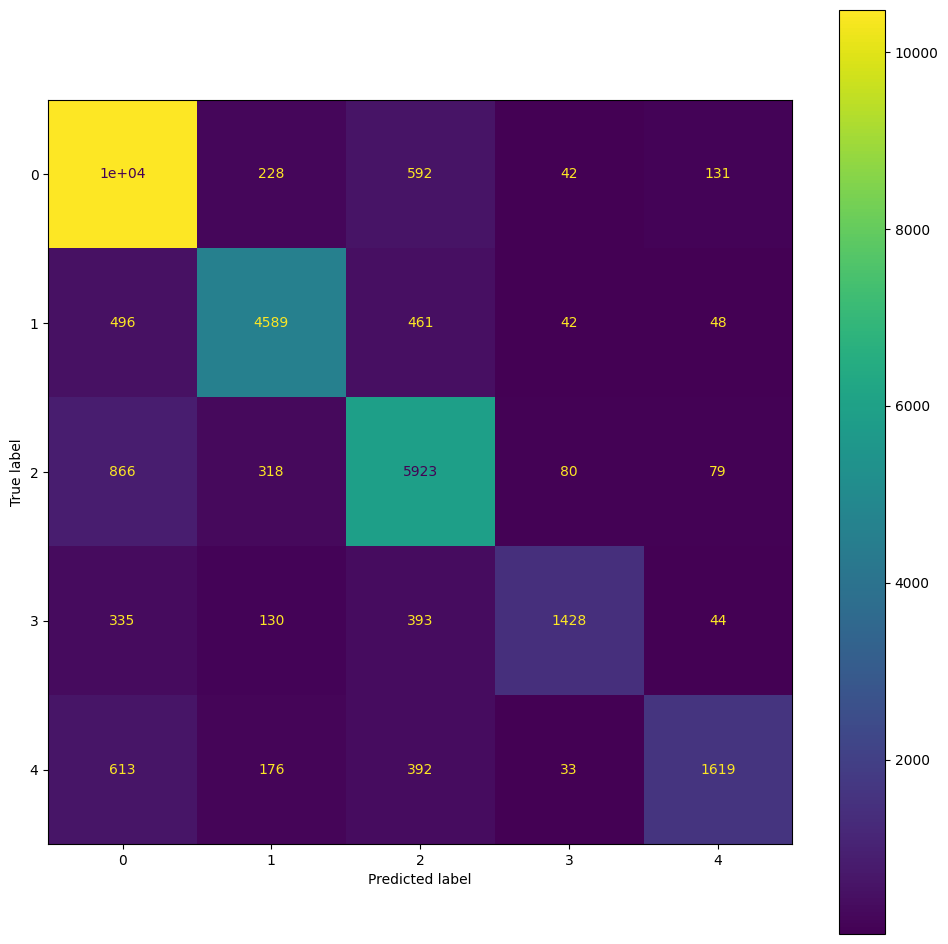

In [ ]:
report(model1, X_train_c, Cleaned_train['y_train'], X_test_c,Cleaned_test['y_test'])

# Label Mapping

Manually created label mapping for the classes:

| Class Index | Class Label |
|-------------|-------------|
| 0           | EG          |
| 1           | LB          |
| 2           | LY          |
| 3           | MA          |
| 4           | SD          |


In [ ]:
# Manually create the label mapping
class_labels = ['EG', 'LB', 'LY', 'MA', 'SD']
label_mapping = {index: label for index, label in enumerate(class_labels)}
inverse_label_mapping = {label: index for index, label in label_mapping.items()}
print(f'Label mapping: {label_mapping}')

Label mapping: {0: 'EG', 1: 'LB', 2: 'LY', 3: 'MA', 4: 'SD'}


# Test Prediction

In [ ]:
# Test with a new string
test_string = ["الفانله البضيا بخطين حمر "]
test_string_c = cntVec.transform(test_string)
test_prediction = model1.predict(test_string_c)
test_prediction_label = [label_mapping[pred] for pred in test_prediction]
print(f'Test prediction for the new string (encoded): {test_prediction}')
print(f'Test prediction for the new string (original label): {test_prediction_label}')

Test prediction for the new string (encoded): [0]
Test prediction for the new string (original label): ['EG']


#### with resample data with RandomOverSampler

# Model Training and Prediction

- Using Logistic Regression with the 'sag' solver and Random OverSampler for handling imbalanced classes.

In [ ]:
model2 = text_fit_predict_with_imbalanced(X_train_c, X_test_c, Cleaned_train['y_train'], Cleaned_test['y_test'], LogisticRegression(solver='sag'), RandomOverSampler())

features: 212835
resample: ((230780, 212835), (230780,))
Train acc: 0.9091178412418953
Test acc: 0.8076727728303931


# Model Evaluation Report

Train acc: 0.9091178412418953
Test acc: 0.8076727728303931
              precision    recall  f1-score   support

           0       0.89      0.83      0.86     11468
           1       0.82      0.85      0.83      5636
           2       0.79      0.80      0.79      7266
           3       0.69      0.73      0.71      2330
           4       0.64      0.71      0.67      2833

    accuracy                           0.81     29533
   macro avg       0.77      0.79      0.77     29533
weighted avg       0.81      0.81      0.81     29533



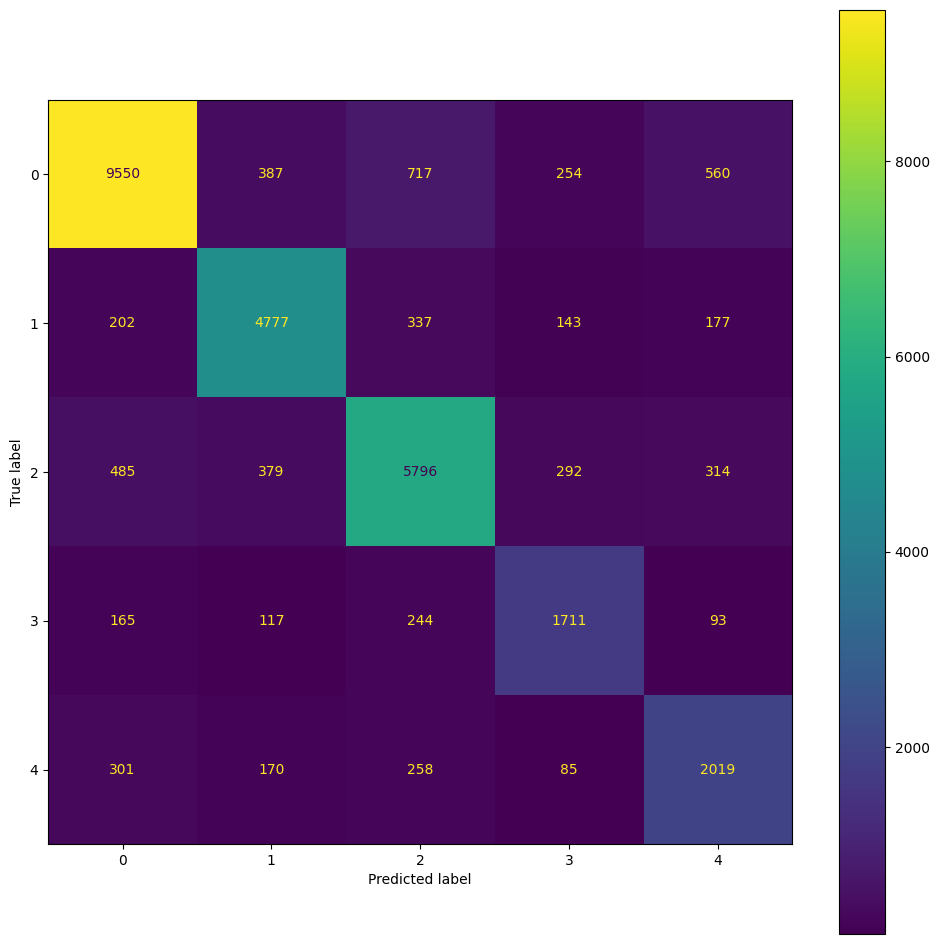

In [ ]:
report(model2, X_train_c, Cleaned_train['y_train'], X_test_c,Cleaned_test['y_test'])

#### with resample data with SMOTE

# Model Training with SMOTE

- Using Logistic Regression with the 'sag' solver and SMOTE for handling imbalanced classes.

In [ ]:
model3 = text_fit_predict_with_imbalanced(X_train_c, X_test_c, Cleaned_train['y_train'], Cleaned_test['y_test'], LogisticRegression(solver='sag'), SMOTE(sampling_strategy='minority'))

features: 212835
resample: ((155094, 212835), (155094,))
Train acc: 0.8315417040510572
Test acc: 0.7655504012460638


Train acc: 0.8315417040510572
Test acc: 0.7655504012460638
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     11468
           1       0.88      0.75      0.81      5636
           2       0.83      0.71      0.77      7266
           3       0.35      0.76      0.48      2330
           4       0.85      0.54      0.66      2833

    accuracy                           0.77     29533
   macro avg       0.75      0.73      0.71     29533
weighted avg       0.81      0.77      0.78     29533



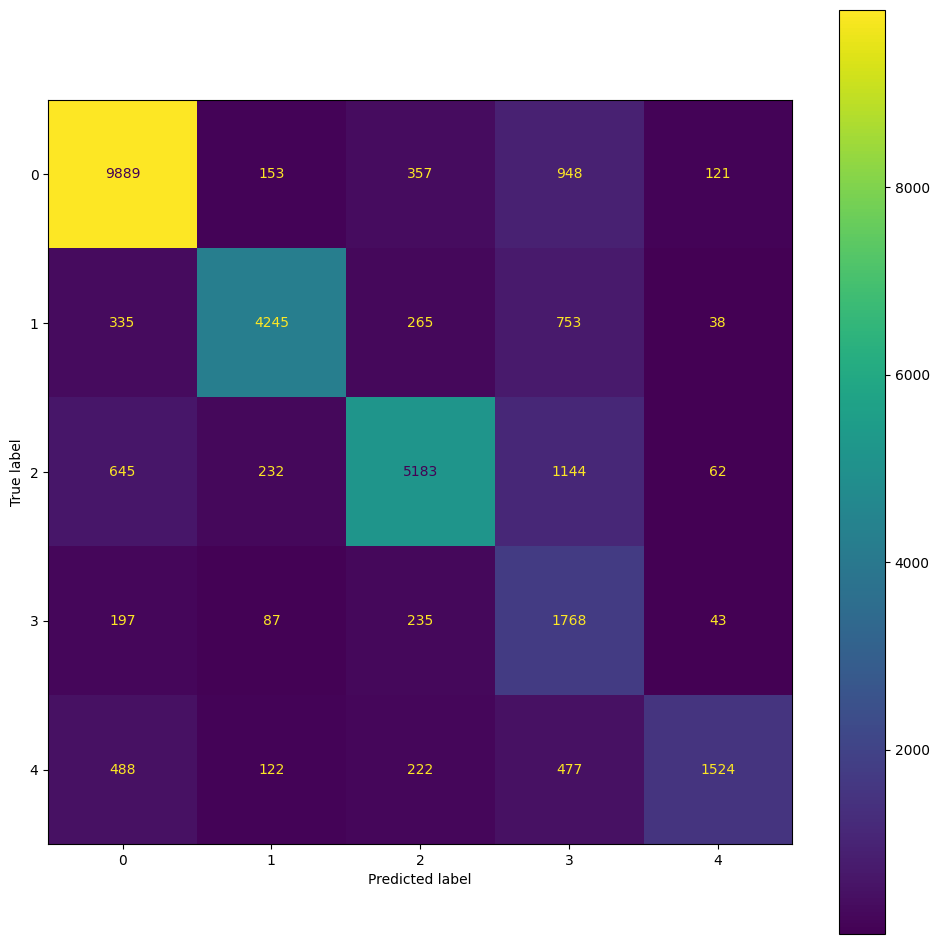

In [ ]:
report(model3, X_train_c, Cleaned_train['y_train'], X_test_c,Cleaned_test['y_test'])

### Build models with TfidfVectorizer

#### with orignal processed data

# Model Training and Prediction without Balancing

- Training and predicting using Logistic Regression without balancing the classes.

In [ ]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(Cleaned_train['cleaned_x_train'])  # fit X_train only
X_test_tfidf = tfidf.transform(Cleaned_test['cleaned_x_test']) # transform X_test
model4 = text_fit_predict_without_imbalanced(X_train_tfidf, X_test_tfidf, Cleaned_train['y_train'], Cleaned_test['y_test'], LogisticRegression(solver='sag'))

Train acc: 0.9106075739364493
Test acc: 0.8224359191412995


In [ ]:
X_train_tfidf

<118142x212835 sparse matrix of type '<class 'numpy.float64'>'
	with 1506444 stored elements in Compressed Sparse Row format>

Train acc: 0.9106075739364493
Test acc: 0.8224359191412995
              precision    recall  f1-score   support

           0       0.82      0.93      0.87     11468
           1       0.86      0.83      0.84      5636
           2       0.78      0.82      0.80      7266
           3       0.89      0.61      0.72      2330
           4       0.85      0.57      0.68      2833

    accuracy                           0.82     29533
   macro avg       0.84      0.75      0.78     29533
weighted avg       0.83      0.82      0.82     29533



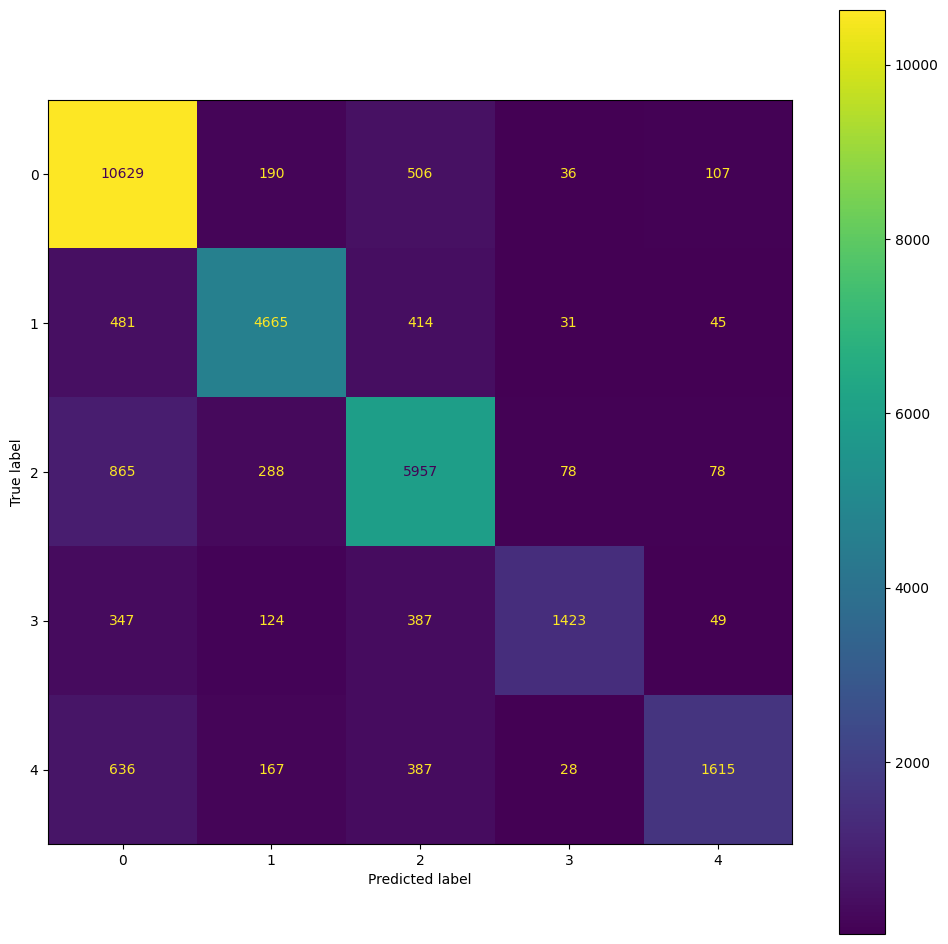

In [ ]:
report(model4, X_train_tfidf, Cleaned_train['y_train'], X_test_tfidf,Cleaned_test['y_test'])

In [ ]:
# Test with a new string
test_string = ["التالته شمال بتهز جبال "]
test_string_c = cntVec.transform(test_string)
test_prediction = model4.predict(test_string_c)
test_prediction_label = [label_mapping[pred] for pred in test_prediction]
print(f'Test prediction for the new string (encoded): {test_prediction}')
print(f'Test prediction for the new string (original label): {test_prediction_label}')

Test prediction for the new string (encoded): [0]
Test prediction for the new string (original label): ['EG']


### With resample data with RandomOverSampler

In [ ]:
model5 = text_fit_predict_with_imbalanced(X_train_tfidf, X_test_tfidf,Cleaned_train['y_train'], Cleaned_test['y_test'], LogisticRegression(solver='sag'), RandomOverSampler())

features: 212835
resample: ((230780, 212835), (230780,))
Train acc: 0.9449814629852211
Test acc: 0.8223343378593437


Train acc: 0.9449814629852211
Test acc: 0.8223343378593437
              precision    recall  f1-score   support

           0       0.89      0.86      0.87     11468
           1       0.84      0.85      0.85      5636
           2       0.80      0.81      0.80      7266
           3       0.72      0.73      0.73      2330
           4       0.68      0.71      0.69      2833

    accuracy                           0.82     29533
   macro avg       0.79      0.79      0.79     29533
weighted avg       0.82      0.82      0.82     29533



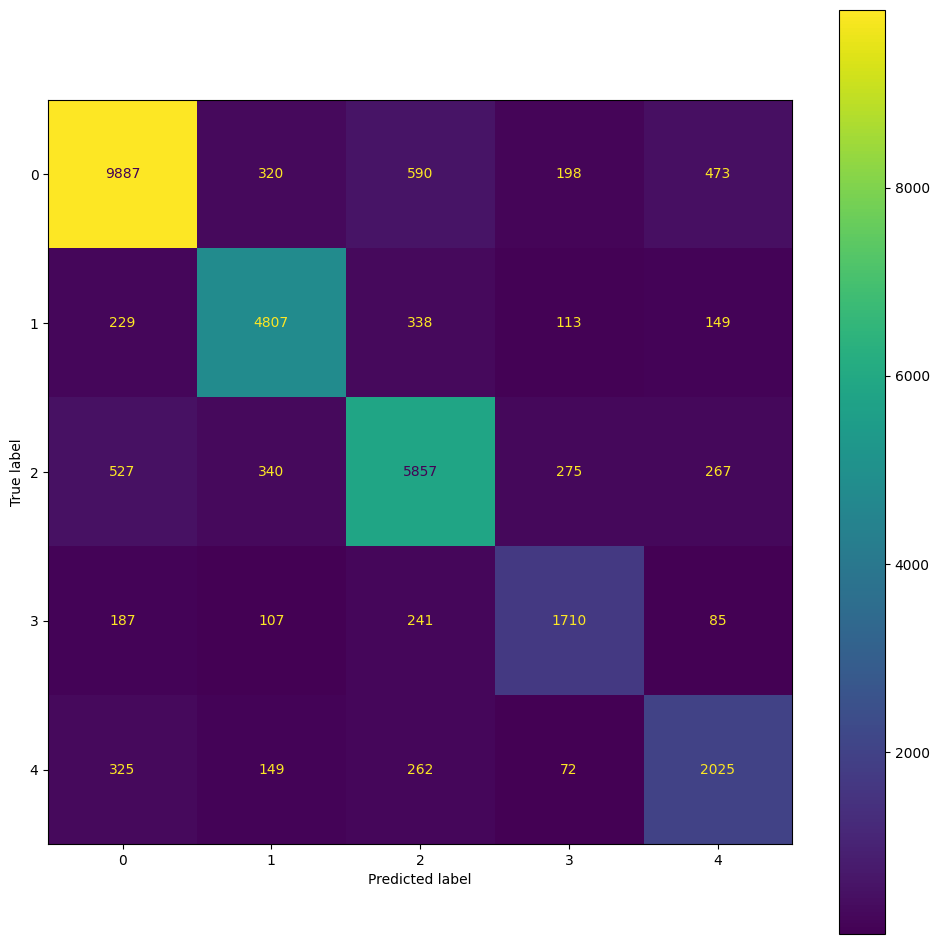

In [ ]:
report(model5, X_train_tfidf, Cleaned_train['y_train'], X_test_tfidf,Cleaned_test['y_test'])

### With resample data with SMOTE

In [ ]:
model6 = text_fit_predict_with_imbalanced(X_train_tfidf, X_test_tfidf, Cleaned_train['y_train'], Cleaned_test['y_test'], LogisticRegression(solver='sag'),  SMOTE(sampling_strategy='minority'))

features: 212835
resample: ((155094, 212835), (155094,))
Train acc: 0.9048941104772223
Test acc: 0.8057765889005519


Train acc: 0.9048941104772223
Test acc: 0.8057765889005519
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     11468
           1       0.88      0.80      0.84      5636
           2       0.83      0.76      0.80      7266
           3       0.50      0.79      0.62      2330
           4       0.88      0.55      0.67      2833

    accuracy                           0.81     29533
   macro avg       0.79      0.76      0.76     29533
weighted avg       0.82      0.81      0.81     29533



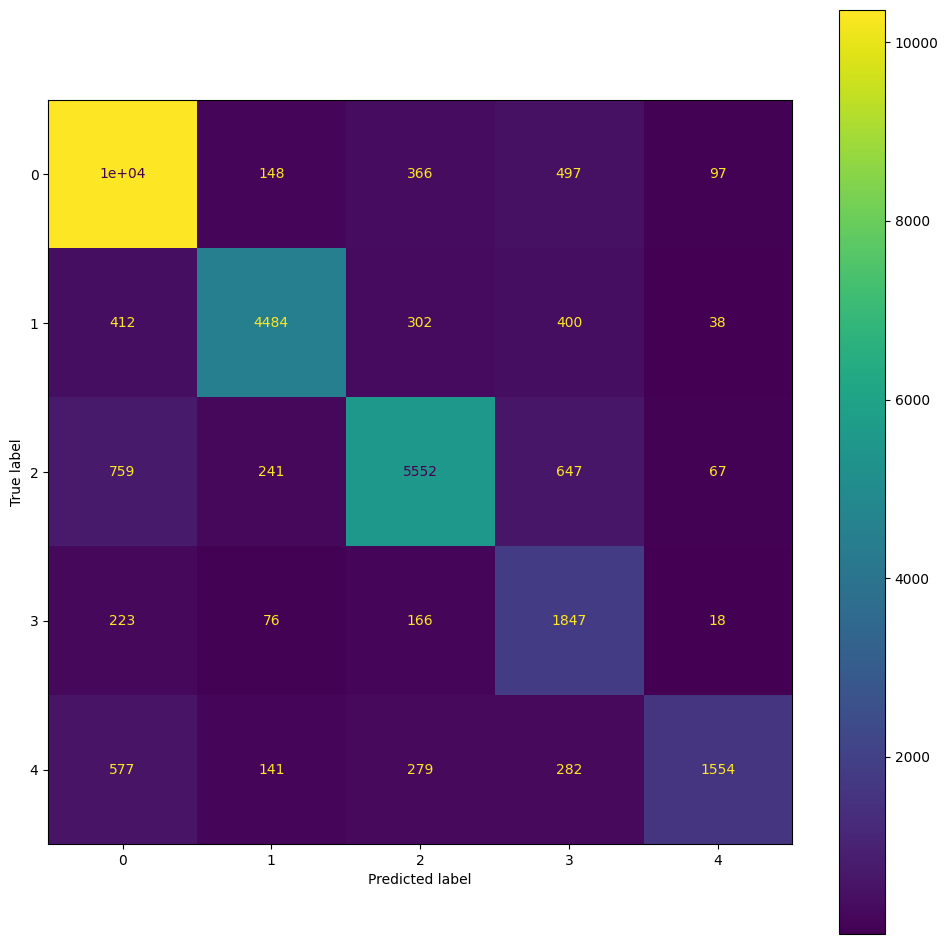

In [ ]:
report(model6, X_train_tfidf, Cleaned_train['y_train'], X_test_tfidf,Cleaned_test['y_test'])

# Grid Search for Hyperparameter Tuning

- Performing hyperparameter tuning using Grid Search with cross-validation.


In [ ]:
grid={'C':10.0 **np.arange(-2,3),'max_iter':[500]}

os =  RandomOverSampler()
X_res, y_res = os.fit_resample(X_train_tfidf, Cleaned_train['y_train'])  # fit resample data

log_model = LogisticRegression(solver='sag')
clf=GridSearchCV(estimator = log_model, param_grid = grid, cv = 5, n_jobs = -1, scoring = 'f1_macro')
clf.fit(X_res, y_res )

GridSearchCV(cv=5, estimator=LogisticRegression(solver='sag'), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'max_iter': [500]},
             scoring='f1_macro')

# Model Evaluation Report

Train acc: 0.991853838414008
Test acc: 0.7922093367893637
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     11468
           1       0.85      0.85      0.85      5636
           2       0.81      0.81      0.81      7266
           3       0.76      0.72      0.74      2330
           4       0.70      0.69      0.69      2833

    accuracy                           0.83     29533
   macro avg       0.80      0.79      0.79     29533
weighted avg       0.83      0.83      0.83     29533



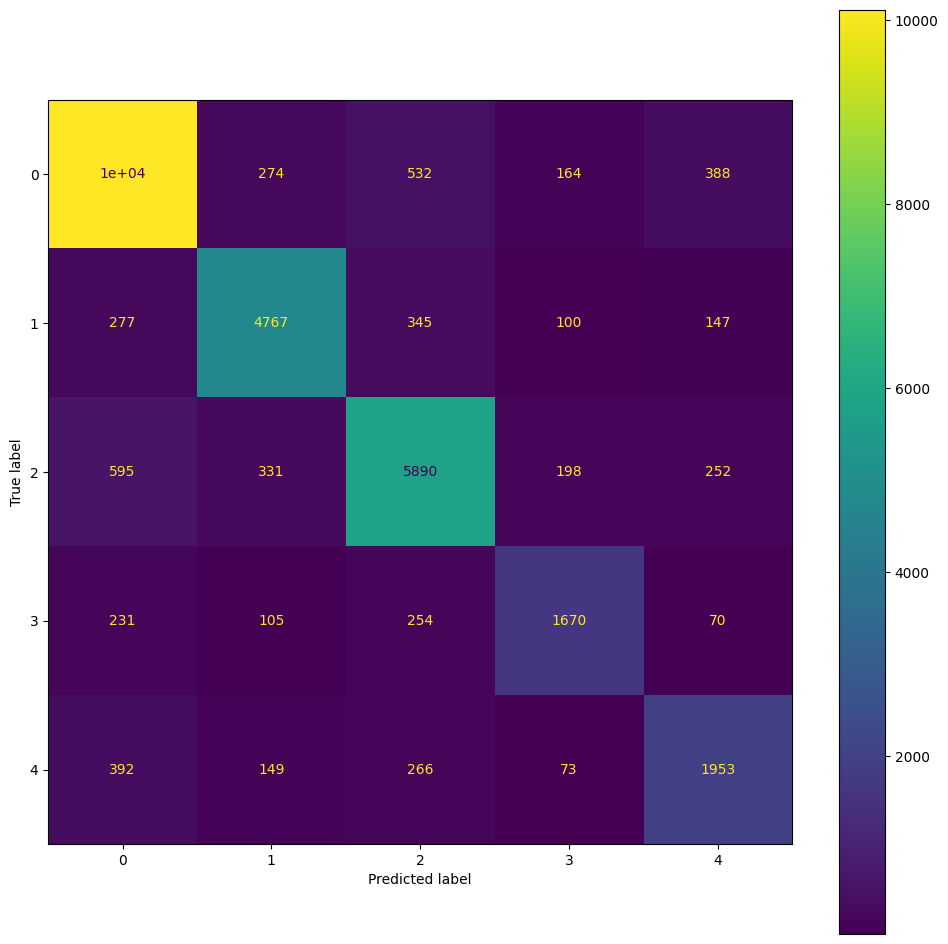

In [ ]:
report(clf, X_train_tfidf, Cleaned_train['y_train'], X_test_tfidf,Cleaned_test['y_test'])

### xgboost

## Fetching Sudan Data via Web Scraping and Merging with Existing Data
-  we aim to enhance our dataset by incorporating more Sudan-related tweets.  
- Given the presence of multiple languages and the dominance of certain
- classes, it is crucial to ensure a balanced representation of tweets from different regions, including Sudan. By scraping additional tweets from Sudan, we can achieve a more comprehensive dataset, which will improve the performance and generalizability of our models.

In [ ]:
cleaned_x_train = pd.read_csv('/content/Cleaned_train.csv')
cleaned_x_test = pd.read_csv('/content/cleaned_x_test.csv')
cleaned_x_valid= pd.read_csv('/content/cleaned_x_valid.csv')


In [ ]:
import pandas as pd
import re

# List of Sudanese proverbs/sayings
proverbs = [
    "سمح الغنا في خشم سيدو",
    "المال تلتوا ولا كتلتوا",
    "التسويها بايدك تغلب اجاويدك",
    "الجمرة تحرق الواطيها",
    "بليلة مباشر ولا ضبيحة مكاشر",
    "قلبي على جناى وقلب جناي على حجر",
    "إن جاتك في مالك سامحتك وإن جاتك في نفسك بكتك",
    "الخير في الملعون زي الشرة في القندول",
    "إن غلبك سدها وسع قدها",
    "المحتاج بفتش خشم البقرة",
    "بخيت شكروه  قال داك شهر تاني",
    "أنا أصلي مارق للربا والتلاف",
    "الما يهدي الكريم تعبان",
    "أمسح إسمو من خارطة ضميرك حكو",
    "شتتو في الخلا وعكس الهبايب فكو",
    "الدين لو درهمين بسود الخدين",
    "هيييي  أرعى بقيدك",
    "بادر الضيف ولو ببرش وقرعة موية",
    "الريد الكتير لابد تعقبو عداوة",
    "لصيق الطين فى الكرعين ما ببقى نعلين",
    "القارصوا الدبيب يخاف من جر الحبل",
    "اتنين كان قالوا ليك اضانك مافى اهبشها",
    "ام جركم مابتاكل خريفين",
    "والفولة بتتملى و بقارة بجو",
    "الدنيا مابتدوم زى الزيق الفى الهدوم",
    "كان فيها خير ما كان رماها الطير",
    "صنعة فى اليد امانة من الفقر",
    "ان عجبك مالك شوف ضل الضحى وان عجبوك رجالك شوف التراب",
    "البفكك من اكل التوم قل اكلو",
    "رزقاً تكوسلوا ورزقا يكوسلك",
    "مابنفع الجس بعد الضبح",
    "ان جادت بخيط العنكبوت تنقاد وكان عاقت تقطع سلسل الحداد",
    "حشاش بدقنو",
    "صاحب بالين كضاب",
    "السمح سمح كان زرعوا يقوم قمح",
    "كراع البقر جيابه",
    "بجى الخريف واللوارى بتقيف",
    "درب السلامة للحول قريب",
    "المال تلتوا ولا كتلتوا",
    "خت الخمسة فى الاتنين",
    "التسوى كريت فى القرض تلقاهو فى جلدها",
    "الماشاف البحر تخلعوا الترعة",
    "القلم ما بزيل بلم",
    "الجاياك ما بتختاك",
    "أرجى سفيه ولا ترجى باطل",
    "أكان شالتك خير، وإن ختتك خيرين",
    "أها  خم وصر",
    "الناس زي الهدوم فيها الراقي وفيها الزي جناح أم جكو",
    "الزائد عن حدو بيقلب ضددو",
    "البيرقص ما بيغطي دقنو",
    "الكحل ما بنفع في العين الحجر",
    "الولادة صغرة والمشي صباح",
    "درب السلامة للحول قريب",
    "بكرة الموز بجيبك يا قرد",
    "شوكة حوت لا بتنبلع لا بتفوت",
    "البيتو من قزاز مايفلق بالحجار",
    "جا يكحلها عماها",
    "تعيس الحظ يلاقي العضمة في الفشفاش",
    "الأدب الأدب الأدب  أخجلوا بعدين أقرو مثل أمي",
    "الما دارك ما خربشك",
    "ايد براها مابتصفق",
    "جلد ماجلدك كر فيهو الشوك",
    "كان كترت عليك الهموم ادمدم نوم",
    "الباب البجيب الريح سدو واستريح",
    "الكلمة الطيبة بتمرق الدابى من بيتو",
    "قدم السبت تلقى الاحد",
    "مد رجليك قدر لحافك",
    "يوم عسل ويوم بصل",
    "العارف عزو مستريح",
    "الحوت ما بهددو بالغرق",
    "اسمع كلام الكبير ولو كان عوير",
    "اصله مارق في الربا والتلاف",
    "الخيل تجقلب والشكر لحماد",
    "ود الفار حفار"
]

# Split the proverbs by dot to create separate entries
proverbs_split = [proverb.split('، ') for proverb in proverbs]

# Flatten the list
proverbs_flat = [item for sublist in proverbs_split for item in sublist]

# Create a DataFrame
df = pd.DataFrame({
    "cleaned_x_train": proverbs_flat,
    "y_train": [4] * len(proverbs_flat)
})

df

,cleaned_x_train,y_train
0,سمح الغنا في خشم سيدو,4
1,المال تلتوا ولا كتلتوا,4
2,التسويها بايدك تغلب اجاويدك,4
3,الجمرة تحرق الواطيها,4
4,بليلة مباشر ولا ضبيحة مكاشر,4
...,...,...
70,الحوت ما بهددو بالغرق,4
71,اسمع كلام الكبير ولو كان عوير,4
72,اصله مارق في الربا والتلاف,4
73,الخيل تجقلب والشكر لحماد,4


In [ ]:
Cleaned_train = pd.concat([cleaned_x_train, df], ignore_index=True)
Cleaned_train

,cleaned_x_train,y_train
0,ردا على سؤالك من قتل المتظاهرينالإجابة عند مرا...,0
1,زي النهاردة من ٥ سنين حضرت اول مرة حكاوي التحر...,0
2,اش هاد الحب من عند جيرانا اللي ربح نفرحولو خاو...,3
3,آه نقوم تورطنا ونهرب مش كدا,0
4,مش حانفتح الرابط هذا لان خليفه مش موضوعي,2
...,...,...
88748,الحوت ما بهددو بالغرق,4
88749,اسمع كلام الكبير ولو كان عوير,4
88750,اصله مارق في الربا والتلاف,4
88751,الخيل تجقلب والشكر لحماد,4


In [ ]:
import pandas as pd

# Your DataFrame df
Cleaned_train = Cleaned_train.sample(frac=1, random_state=42)  # Shuffle the DataFrame randomly

Cleaned_train


,cleaned_x_train,y_train
84606,انتو طبعا لأنه الدعارة مشهورين بيها ما يحتاج ن...,4
48193,اخت مى أنا مؤيد كل كلامك لانه فعلا ده واقع بنع...,0
75127,من يومين رحت بار في اسكندرية مع صديق وطلب ستلا...,0
81803,تمام ان شاء الله تو ندورك,2
56140,بالضبط صدقت دين هي وواجب سداده,2
...,...,...
6265,الاثنين شبه الصورة اللي عند دكتور التجميل,0
54886,تصوري هو ميليقش عليه الا مرتضى منصور متعمد يجي...,0
76820,ربي يرحمه ويوسع عليه,2
860,قينما نربح شي ديال الكوزينة كانديها للواليدة و...,3


In [ ]:
Cleaned_train.to_csv("Cleaned_train.csv",index=False)

In [ ]:
# Install required packages if not already installed
!pip install xgboost scikit-learn

In [ ]:
import xgboost as xgb


In [ ]:
def text_fit_predict_with_imbalanced(X_train, X_test, y_train, y_test, model_model, re_sample):

  print('features: {}'.format(X_train.shape[1]))

  os =  re_sample  # type of resample (RandomOverSampler or SMOTE)
  X_res, y_res = os.fit_resample(X_train, y_train)
  print(f'resample: {X_res.shape, y_res.shape}')

  model=model_model.fit(X_res, y_res)
  train_acc = model.score(X_train, y_train)
  test_acc = model.score(X_test, y_test)
  print(f'Train acc: {train_acc}')
  print(f'Test acc: {test_acc}')

  return model

In [ ]:
# Create the pipeline with CountVectorizer and XGBoost classifier
vec = CountVectorizer(max_features=5000, ngram_range=(1, 2))
clf = xgb.XGBClassifier(
    objective='multi:softmax',
    booster='gbtree',
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=6,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,
    seed=27
)
pipe = make_pipeline(vec, clf)

# Fit the model
pipe.fit(Cleaned_train.cleaned_x_train, Cleaned_train.y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:10:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster='gbtree',
                               callbacks=None, colsample_bylevel=None,
                               colsample_bynode=None, colsample_bytree=0.8,
                               device=None, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=1000,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softmax', ...))])

In [ ]:
# Validate the model
print_report(pipe, cleaned_x_valid.cleaned_x_valid, cleaned_x_valid.y_valid)

# Test the model
print_report(pipe, cleaned_x_test.cleaned_x_test, cleaned_x_test.y_test)

              precision    recall  f1-score   support

           0       0.74      0.91      0.82     11480
           1       0.84      0.74      0.79      5508
           2       0.73      0.74      0.73      7350
           3       0.87      0.55      0.68      2285
           4       0.81      0.49      0.61      2916

    accuracy                           0.77     29539
   macro avg       0.80      0.69      0.73     29539
weighted avg       0.77      0.77      0.76     29539

macro f1_score: 0.726
              precision    recall  f1-score   support

           0       0.75      0.91      0.82     11468
           1       0.84      0.74      0.79      5636
           2       0.72      0.72      0.72      7266
           3       0.85      0.56      0.68      2330
           4       0.81      0.52      0.63      2833

    accuracy                           0.77     29533
   macro avg       0.79      0.69      0.73     29533
weighted avg       0.77      0.77      0.76     29533



------------

# Deep learning models

In [ ]:
x_train_padded = pd.read_csv('/content/x_train_padded.csv')
x_test_padded = pd.read_csv('/content/x_test_padded.csv')
x_valid_padded = pd.read_csv('/content/x_valid_padded.csv')

In [ ]:
x_train_padded

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,y_train
0,53.0,598.0,40.0,4565.0,1.0,9495.0,7404.0,111.0,43667.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,564.0,644.0,26071.0,6.0,1895.0,3113.0,12139.0,8884.0,1058.0,125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,5775.0,413.0,5775.0,5775.0,5775.0,5775.0,5775.0,5775.0,101.0,5775.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,99.0,3.0,10234.0,8318.0,1390.0,2.0,804.0,68139.0,1592.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,10.0,1694.0,5513.0,29.0,2140.0,456.0,1.0,63.0,3.0,68140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88625,1.0,814.0,5546.0,6.0,187673.0,34096.0,187674.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
88626,1325.0,36990.0,16060.0,41664.0,32033.0,7.0,3412.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
88627,132.0,519.0,66358.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
88628,108.0,131.0,566.0,34933.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


# Renaming Columns

- Renaming the columns of the DataFrame `x_valid_padded`.

In [ ]:
x_valid_padded.columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', 'y_train']

In [ ]:
padded_train = pd.concat([x_train_padded, x_valid_padded], ignore_index=True)
padded_train

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,y_train
0,53.0,598.0,40.0,4565.0,1.0,9495.0,7404.0,111.0,43667.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,564.0,644.0,26071.0,6.0,1895.0,3113.0,12139.0,8884.0,1058.0,125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,5775.0,413.0,5775.0,5775.0,5775.0,5775.0,5775.0,5775.0,101.0,5775.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,99.0,3.0,10234.0,8318.0,1390.0,2.0,804.0,68139.0,1592.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,10.0,1694.0,5513.0,29.0,2140.0,456.0,1.0,63.0,3.0,68140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118169,7.0,3287.0,205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
118170,18803.0,3340.0,723.0,166.0,86.0,4.0,291.0,3678.0,15.0,14230.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
118171,18.0,65.0,42923.0,36.0,12117.0,138.0,377.0,14367.0,87.0,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
118172,21.0,1814.0,1002.0,1971.0,1814.0,26.0,48199.0,2274.0,18.0,130672.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
Unique_Words=187345
input_length=50
EMBEDDING_DIM=100

## Define the Vanilla RNN Model Architecture

In [ ]:
def create_rnn_model(VOCAB_SIZE, max_sequence_len):
    model = Sequential()
    model.add(Embedding(VOCAB_SIZE, 64))
    model.add(SimpleRNN(64))
    model.add(Dense(5, activation='softmax'))
    return model

Create the model

In [ ]:
rnn_model = create_rnn_model(VOCAB_SIZE, max_sequence_len)

Compile the model

In [ ]:
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
rnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model

- RNN Vanila

In [ ]:
history = rnn_model.fit(x_train_padded, y_train, epochs=10, batch_size=64, validation_data=(x_valid_padded, y_valid))

Epoch 1/10
1385/1385 ━━━━━━━━━━━━━━━━━━━━ 147s 104ms/step - accuracy: 0.4080 - loss: 1.4210 - val_accuracy: 0.5539 - val_loss: 1.1119
Epoch 2/10
1385/1385 ━━━━━━━━━━━━━━━━━━━━ 143s 103ms/step - accuracy: 0.6310 - loss: 0.9877 - val_accuracy: 0.6648 - val_loss: 0.9499
Epoch 3/10
1385/1385 ━━━━━━━━━━━━━━━━━━━━ 140s 101ms/step - accuracy: 0.7676 - loss: 0.6641 - val_accuracy: 0.6660 - val_loss: 0.9834
Epoch 4/10
1385/1385 ━━━━━━━━━━━━━━━━━━━━ 139s 100ms/step - accuracy: 0.8364 - loss: 0.4882 - val_accuracy: 0.6593 - val_loss: 1.0871
Epoch 5/10
1385/1385 ━━━━━━━━━━━━━━━━━━━━ 148s 107ms/step - accuracy: 0.8664 - loss: 0.4139 - val_accuracy: 0.6342 - val_loss: 1.1321
Epoch 6/10
1385/1385 ━━━━━━━━━━━━━━━━━━━━ 140s 101ms/step - accuracy: 0.9003 - loss: 0.3331 - val_accuracy: 0.6448 - val_loss: 1.2060
Epoch 7/10
1385/1385 ━━━━━━━━━━━━━━━━━━━━ 144s 104ms/step - accuracy: 0.8959 - loss: 0.3449 - val_accuracy: 0.5031 - val_loss: 1.3508
Epoch 8/10
1385/1385 ━━━━━━━━━━━━━━━━━━━━ 144s 104ms/step - ac

In [ ]:
# Evaluate the model
loss, accuracy = rnn_model.evaluate(x_valid_padded, y_valid)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

924/924 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6388 - loss: 1.2160
Validation Loss: 1.2186534404754639
Validation Accuracy: 0.6392837762832642


Training and Validation Accuracy Visualization

In [ ]:
# Evaluate the model
loss, accuracy = rnn_model.evaluate(x_test_padded, y_test)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

924/924 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6461 - loss: 1.2105
Validation Loss: 1.2039719820022583
Validation Accuracy: 0.6443609595298767


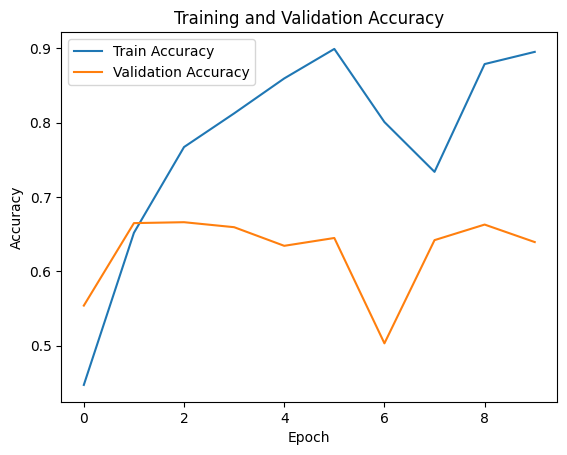

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


## GRU Model

In [ ]:
# Define the GRU model creation function
def create_gru_model(vocab_size, max_sequence_len):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_sequence_len))
    model.add(GRU(units=128, return_sequences=False))
    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Create the GRU model instance
gru_model = create_gru_model(VOCAB_SIZE, max_sequence_len)
gru_model.summary()

c:\Users\bios\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = gru_model.fit(x_train_padded, y_train, epochs=10, batch_size=64, validation_data=(x_valid_padded, y_valid))

Epoch 1/10
1385/1385 ━━━━━━━━━━━━━━━━━━━━ 313s 224ms/step - accuracy: 0.4551 - loss: 1.3175 - val_accuracy: 0.7994 - val_loss: 0.5728
Epoch 2/10
1385/1385 ━━━━━━━━━━━━━━━━━━━━ 318s 229ms/step - accuracy: 0.8787 - loss: 0.3647 - val_accuracy: 0.8307 - val_loss: 0.5013
Epoch 3/10
1385/1385 ━━━━━━━━━━━━━━━━━━━━ 323s 233ms/step - accuracy: 0.9702 - loss: 0.0978 - val_accuracy: 0.8217 - val_loss: 0.6277
Epoch 4/10
1385/1385 ━━━━━━━━━━━━━━━━━━━━ 319s 230ms/step - accuracy: 0.9901 - loss: 0.0338 - val_accuracy: 0.8101 - val_loss: 0.7691
Epoch 5/10
1385/1385 ━━━━━━━━━━━━━━━━━━━━ 332s 240ms/step - accuracy: 0.9950 - loss: 0.0162 - val_accuracy: 0.8068 - val_loss: 0.9536
Epoch 6/10
1385/1385 ━━━━━━━━━━━━━━━━━━━━ 324s 234ms/step - accuracy: 0.9966 - loss: 0.0109 - val_accuracy: 0.8051 - val_loss: 1.0200
Epoch 7/10
1385/1385 ━━━━━━━━━━━━━━━━━━━━ 327s 236ms/step - accuracy: 0.9974 - loss: 0.0078 - val_accuracy: 0.8050 - val_loss: 1.0701
Epoch 8/10
1385/1385 ━━━━━━━━━━━━━━━━━━━━ 323s 233ms/step - ac

In [ ]:
# Evaluate the model
loss, accuracy = gru_model.evaluate(x_test_padded, y_test)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

924/924 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8005 - loss: 1.2135
Validation Loss: 1.208317518234253
Validation Accuracy: 0.7994855046272278


In [ ]:
print(classification_report(y_valid, y_pred, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']))

              precision    recall  f1-score   support

     Class 1       0.82      0.89      0.86     11482
     Class 2       0.84      0.80      0.82      5508
     Class 3       0.79      0.77      0.78      7351
     Class 4       0.80      0.62      0.70      2285
     Class 5       0.64      0.63      0.63      2918

    accuracy                           0.80     29544
   macro avg       0.78      0.74      0.76     29544
weighted avg       0.80      0.80      0.80     29544



##  LSTM Model

- Define a Keras model using Sequential API and compile it with custom metrics.

In [ ]:
# Define your Keras model
model = Sequential()
model.add(Embedding(Unique_Words, EMBEDDING_DIM, input_length=input_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))

# Compile your Keras model with custom metrics
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 100)           18734500  
                                                                 
 spatial_dropout1d_4 (Spati  (None, 50, 100)           0         
 alDropout1D)                                                    
                                                                 
 lstm_4 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 5)                 505       
                                                                 
Total params: 18815405 (71.78 MB)
Trainable params: 18815405 (71.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
X_train=padded_train.drop('y_train',axis=1)
y_train=padded_train['y_train']

In [ ]:
y_train

0         1
1         1
2         0
3         2
4         1
         ..
118169    0
118170    0
118171    0
118172    2
118173    0
Name: y_train, Length: 118174, dtype: int64

In [ ]:
X_test=x_test_padded.drop('y_test',axis=1)
y_test=x_test_padded['y_test']

Training Keras Model

- Training the Keras model with specified epochs and batch size.

In [ ]:
epochs = 4
batch_size = 64
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=1, min_delta=0.0001)])

Epoch 1/4
3693/3693 [==============================] - 657s 177ms/step - loss: 1.4311 - accuracy: 0.4086 - val_loss: 1.4562 - val_accuracy: 0.3882
Epoch 2/4
3693/3693 [==============================] - 646s 175ms/step - loss: 1.2877 - accuracy: 0.4760 - val_loss: 0.8876 - val_accuracy: 0.6833
Epoch 3/4
3693/3693 [==============================] - 637s 173ms/step - loss: 0.5653 - accuracy: 0.8056 - val_loss: 0.4911 - val_accuracy: 0.8316
Epoch 4/4
3693/3693 [==============================] - 627s 170ms/step - loss: 0.2670 - accuracy: 0.9142 - val_loss: 0.4828 - val_accuracy: 0.8403


Evaluate Keras Model

- Evaluate the trained Keras model on the test set.
- And This is the best Model until now

In [ ]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

924/924 [==============================] - 16s 17ms/step - loss: 0.4828 - accuracy: 0.8403
Test set
  Loss: 0.483
  Accuracy: 0.840


Generate Classification Report

- Generate the classification report

In [ ]:
# Assuming y_pred is your model's predictions on X_test
y_pred = model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

924/924 [==============================] - 15s 17ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89     11470
           1       0.89      0.83      0.86      5636
           2       0.80      0.83      0.82      7269
           3       0.87      0.68      0.76      2330
           4       0.80      0.65      0.72      2839

    accuracy                           0.84     29544
   macro avg       0.84      0.78      0.81     29544
weighted avg       0.84      0.84      0.84     29544



In [ ]:
y_test.shape,y_pred.shape

((29544,), (29544, 5))

Plot Training and Validation Metrics

- Visualize the training and validation accuracy and loss values over epochs.

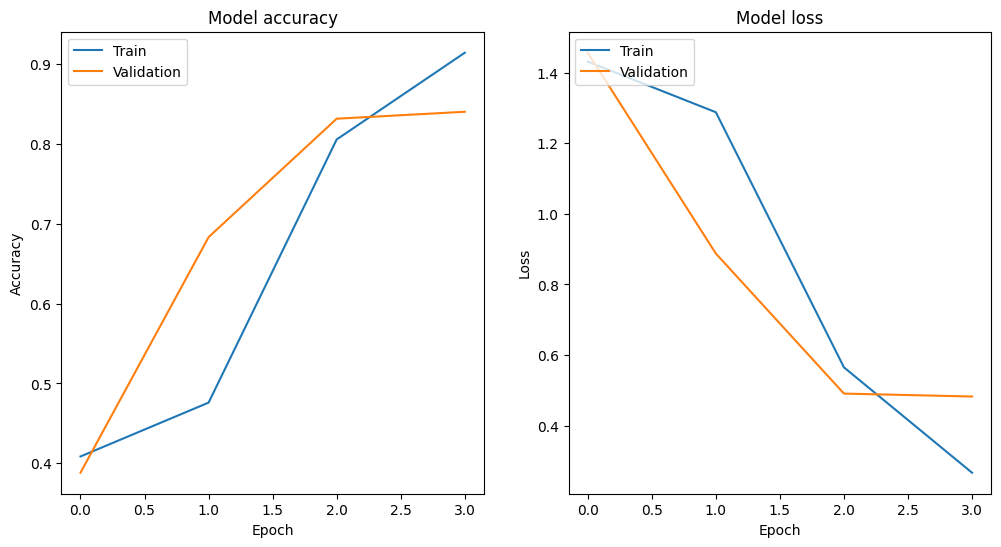

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Display the plots
plt.show()

# Save models using pickle

# Save Best Model

Save the best model (`model4`) using pickle.

In [ ]:
# best model is model4
import pickle
filename = 'DL_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename = 'TfidfVectorizer.pkl'
pickle.dump(model4, open(filename, 'wb'))

In [ ]:
filename = 'CountVectorizer.pkl'
pickle.dump(model1, open(filename, 'wb'))